In [480]:
import numpy as np
import matplotlib.pyplot as plt

In [481]:
# generate Header and payload, both assumed to be random
pl_size = 5#640*480*4
H_size = 2#64
header = np.random.randint(2,size=H_size)
pLoad = np.random.randint(2,size=pl_size)
m = np.append(header, pLoad)
if m[0] == 1:
    m = np.append([1,0,1,0], m)
else:
    m = np.append([0,1,0,1], m)
print(m)

[0 1 0 1 0 0 0 0 0 1 1]


Text(0.5, 1.0, 'BPSK Modulated')

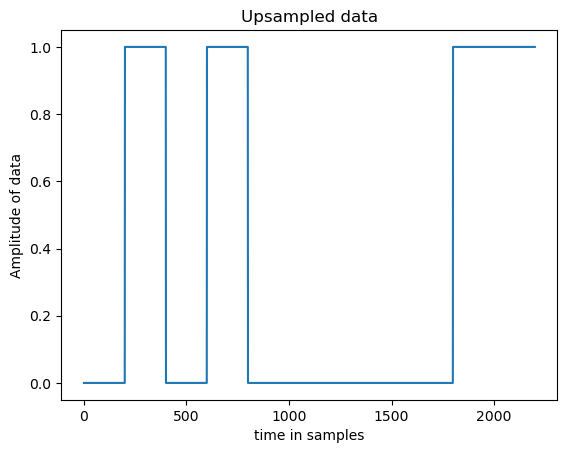

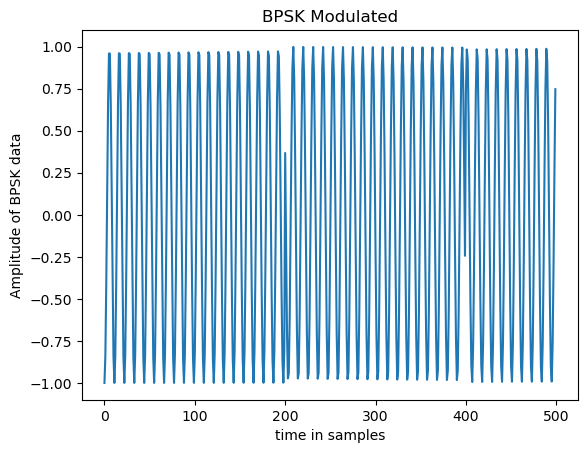

In [518]:
#BPSK modulator and mixing

minv = ~m%2     #inverted message for 0 in BPSK scheme
int_freq = 100
minv_up = np.repeat(minv,2*int_freq)
m_up = np.repeat(m,2*int_freq)
t = np.linspace(-1,1,2*int_freq*len(m))
A = 1
plt.figure(1)
plt.plot(m_up)
plt.xlabel('time in samples')
plt.ylabel('Amplitude of data')
plt.title('Upsampled data')
phi1 = np.cos(2*np.pi*int_freq*t)
phi0 = -np.cos(2*np.pi*int_freq*t)

X1 = np.multiply(phi1, m_up)
X0 = np.multiply(phi0, minv_up)
X = (X1+X0)*A
plt.figure(2)
plt.plot(X[0:500])
plt.xlabel('time in samples')
plt.ylabel('Amplitude of BPSK data')
plt.title('BPSK Modulated')

Text(0.5, 1.0, 'Added Noise')

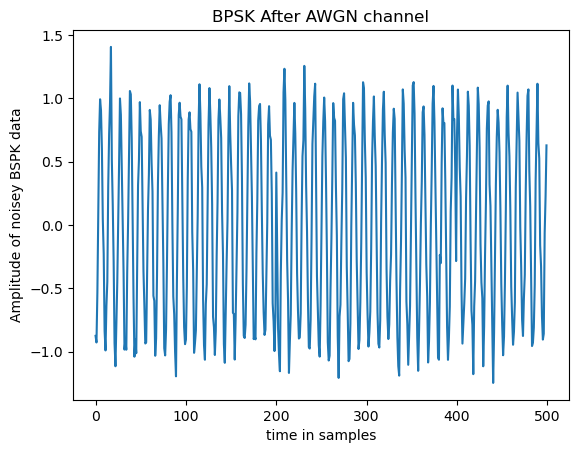

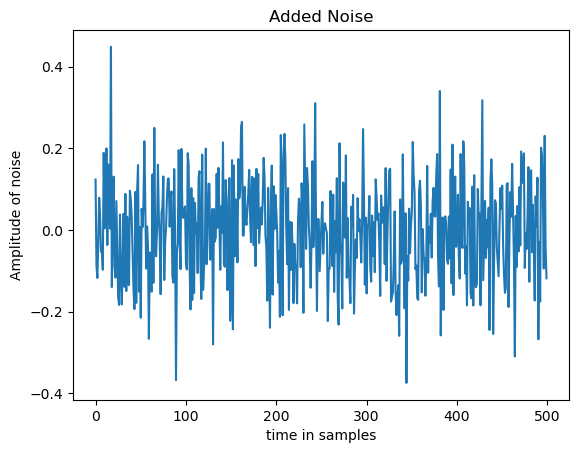

In [513]:
#AWGN channel

#generate variance from Eb/N0 array
EbN0dB = np.linspace(0,15)
EbN0 = 10 ** (EbN0dB/10)
p = 1
R = 1
var = (p/R)/(2*EbN0)

#simulate AWGN channel
var_idx = len(var)-1
mue = 0
z = np.sqrt(var[var_idx])*np.random.normal(0,1,len(X))
Y = z+X
plt.figure(1)
plt.plot(Y[0:500])
plt.xlabel('time in samples')
plt.ylabel('Amplitude of noisey BSPK data')
plt.title('BPSK After AWGN channel')
plt.figure(2)
plt.plot(z[0:500])
plt.xlabel('time in samples')
plt.ylabel('Amplitude of noise')
plt.title('Added Noise')


Text(0, 0.5, 'Amplitude of data')

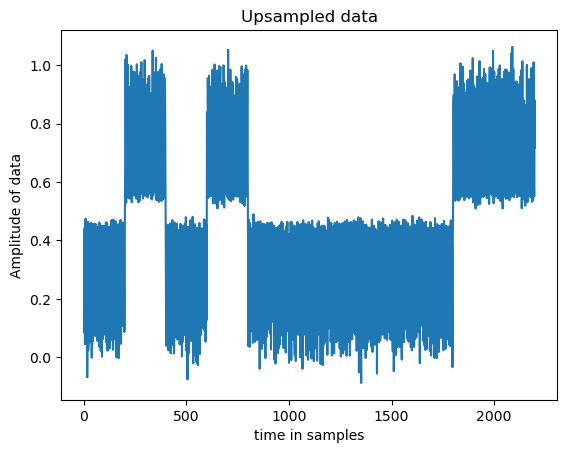

In [514]:
#Ideal coherent demodulator (This will not work for the final but it is simple to implement so for now it's gotta work)
m_hat = np.zeros(len(m))
Y_med = Y*phi1  #Isolate data from modulation with funky trig
avg_kernel = np.zeros(len(Y))
avg_kernel = [0.5, 0.5]     #LPF
m_int = (np.convolve(Y_med, avg_kernel)[1:len(Y)+1]+1)/2    #Data but with more than one sample per bit
m_hat = np.ndarray.round(m_int[1:len(m_int):200]).astype(int)   #convert from sampled to binary sequence
plt.plot(m_int)
plt.xlabel('time in samples')
plt.title('Upsampled data')
plt.ylabel('Amplitude of data')